In [3]:
from tools.keysightBin.importAgilentBin import readfile
import matplotlib.pyplot as plt
import numpy as np

In [4]:
binary = "scope_9"

In [5]:
bin_data_path = f"realsignal/{binary}.bin"
pic_data_path = f"realsignal/{binary}.png"
time, data1 = readfile(bin_data_path, 0)
time, data2 = readfile(bin_data_path, 1)
time, data3 = readfile(bin_data_path, 2)
time, data4 = readfile(bin_data_path, 3)
#Print some information of data
#Time resolution
print(f"Time resolution: {time[1] - time[0]}")
#Time range
print(f"Time range: {time[0] - time[-1]}")
#Data range in each channel
print(f"Data range in channel 1: {np.min(data1) - np.max(data1)}")
print(f"Data range in channel 2: {np.min(data2) - np.max(data2)}")
print(f"Data range in channel 3: {np.min(data3) - np.max(data3)}")
print(f"Data range in channel 4: {np.min(data4) - np.max(data4)}")
#Data length
print(f"Data length: {len(data1)}")

Time resolution: 3.0000180001876764e-06
Time range: -0.499998
Data range in channel 1: -0.9889447093009949
Data range in channel 2: -1.5879396796226501
Data range in channel 3: -2.894472360610962
Data range in channel 4: -0.36582913249731064
Data length: 166666


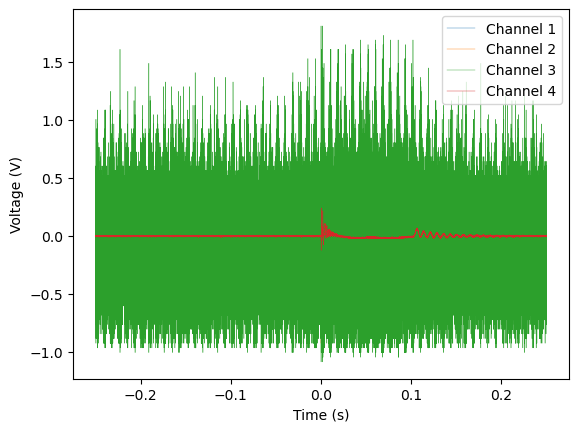

In [6]:
plt.plot(time, data1, label="Channel 1", linewidth=0.3)
plt.plot(time, data2, label="Channel 2", linewidth=0.3)
plt.plot(time, data3, label="Channel 3", linewidth=0.3)
plt.plot(time, data4, label="Channel 4", linewidth=0.3)
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.legend()
plt.show()

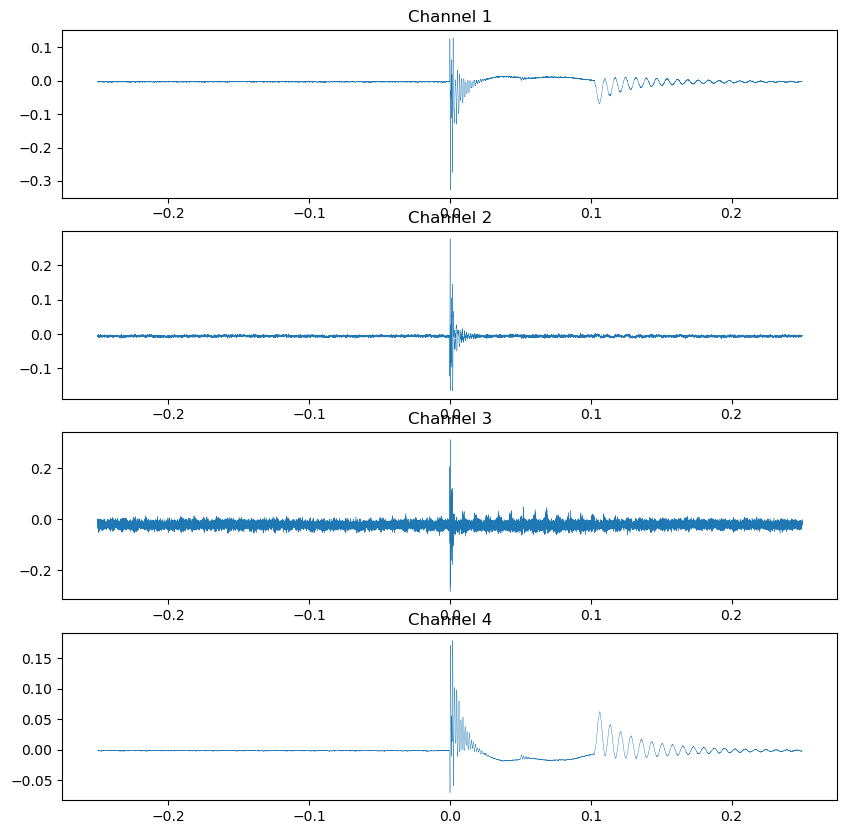

In [9]:
#Using moving average filter on each channel
data1_mavg = np.convolve(data1, np.ones(100)/100, mode='same')
data2_mavg = np.convolve(data2, np.ones(100)/100, mode='same')
data3_mavg = np.convolve(data3, np.ones(100)/100, mode='same')
data4_mavg = np.convolve(data4, np.ones(100)/100, mode='same')

#Plot in 4 subplots
fig, axs = plt.subplots(4, 1, figsize=(10, 10))
axs[0].plot(time, data1_mavg, label="Channel 1", linewidth=0.3)
axs[0].set_title("Channel 1")
axs[1].plot(time, data2_mavg, label="Channel 2", linewidth=0.3)
axs[1].set_title("Channel 2")
axs[2].plot(time, data3_mavg, label="Channel 3", linewidth=0.3)
axs[2].set_title("Channel 3")
axs[3].plot(time, data4_mavg, label="Channel 4", linewidth=0.3)
axs[3].set_title("Channel 4")
plt.savefig("raw_signal.png")

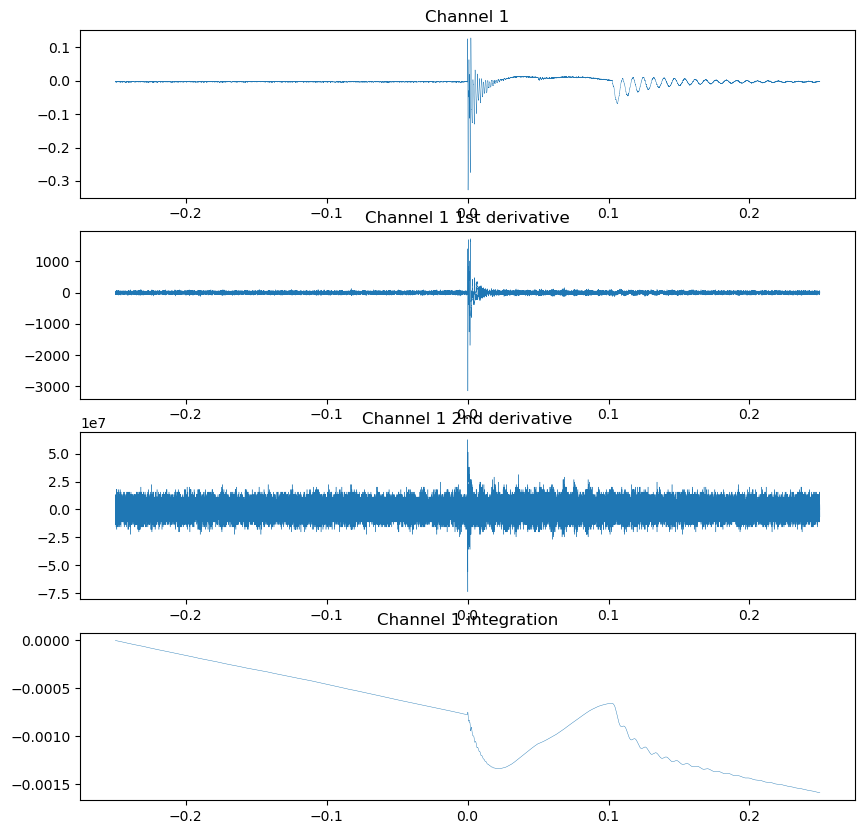

In [11]:
#Get 1st degree derivative, 2nd degree derivative, 1st integration of channel 1
data1_1st_dev = np.gradient(data1_mavg, time)
data1_2nd_dev = np.gradient(data1_1st_dev, time)
data1_int = np.cumsum(data1_mavg) * (time[1] - time[0])

#Plot in 4 subplots
fig, axs = plt.subplots(4, 1, figsize=(10, 10))
axs[0].plot(time, data1_mavg, label="Channel 4", linewidth=0.3)
axs[0].set_title("Channel 1")
axs[1].plot(time, data1_1st_dev, label="Channel 1", linewidth=0.3)
axs[1].set_title("Channel 1 1st derivative")
axs[2].plot(time, data1_2nd_dev, label="Channel 2", linewidth=0.3)
axs[2].set_title("Channel 1 2nd derivative")
axs[3].plot(time, data1_int, label="Channel 3", linewidth=0.3)
axs[3].set_title("Channel 1 integration")
plt.savefig("numerical.png")